In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid", context="paper", font_scale=1.5, palette="colorblind")

In [2]:
def bias_calculation(df_g_xl, df_se_xl):
  male_count_g_xl = df_g_xl['Male'].sum()
  female_count_g_xl = df_g_xl['Female'].sum()

  male_count_se_xl = df_se_xl['Male'].sum()
  female_count_se_xl = df_se_xl['Female'].sum()

  total_g_xl = male_count_g_xl + female_count_g_xl
  total_se_xl = male_count_se_xl + female_count_se_xl

  percentage_male_g_xl = male_count_g_xl*100/total_g_xl
  percentage_female_g_xl = female_count_g_xl*100/total_g_xl

  percentage_male_se_xl = male_count_se_xl*100/total_se_xl
  percentage_female_se_xl = female_count_se_xl*100/total_se_xl

  return percentage_male_g_xl, percentage_female_g_xl, percentage_male_se_xl, percentage_female_se_xl

SD3

In [3]:
# bias calculation

df_g3 = pd.read_csv('G_gender_count_3.csv')
df_se3 = pd.read_csv('SE_gender_count_3.csv')

male_count_g3 = df_g3['Male'].sum()
female_count_g3 = df_g3['Female'].sum()

male_count_se3 = df_se3['Male'].sum()
female_count_se3 = df_se3['Female'].sum()

total_g3 = male_count_g3 + female_count_g3
total_se3 = male_count_se3 + female_count_se3

percentage_male_g3 = (male_count_g3/total_g3)*100
percentage_female_g3 = (female_count_g3/total_g3)*100

percentage_male_se3 = (male_count_se3/total_se3)*100
percentage_female_se3 = (female_count_se3/total_se3)*100 

SD2

In [4]:
# bias calculation

df_g2 = pd.read_csv('G_gender_count_2.csv')
df_se2 = pd.read_csv('SE_gender_count_2.csv')

male_count_g2 = df_g2['Male'].sum()
female_count_g2 = df_g2['Female'].sum()

male_count_se2 = df_se2['Male'].sum()
female_count_se2 = df_se2['Female'].sum()

total_g2 = male_count_g2 + female_count_g2
total_se2 = male_count_se2 + female_count_se2

percentage_male_g2 = male_count_g2*100/total_g2
percentage_female_g2 = female_count_g2*100/total_g2

percentage_male_se2 = male_count_se2*100/total_se2
percentage_female_se2 = female_count_se2*100/total_se2

SDXL

In [5]:
# bias calculation

df_g_xl = pd.read_csv('G_gender_count_xl.csv')
df_se_xl = pd.read_csv('SE_gender_count_xl.csv')


male_count_g_xl = df_g_xl['Male'].sum()
female_count_g_xl = df_g_xl['Female'].sum()

male_count_se_xl = df_se_xl['Male'].sum()
female_count_se_xl = df_se_xl['Female'].sum()

total_g_xl = male_count_g_xl + female_count_g_xl
total_se_xl = male_count_se_xl + female_count_se_xl

percentage_male_g_xl = male_count_g_xl*100/total_g_xl
percentage_female_g_xl = female_count_g_xl*100/total_g_xl

percentage_male_se_xl = male_count_se_xl*100/total_se_xl
percentage_female_se_xl = female_count_se_xl*100/total_se_xl

## FLUX

In [6]:
flux_g = pd.read_csv('G_gender_count_flux.csv')
flux_se = pd.read_csv('SE_gender_count_flux.csv')

perc_male_g_flux, perc_female_g_flux, perc_male_se_flux, perc_female_se_flux = bias_calculation(flux_g, flux_se)

## Segmind

In [7]:
segmind_g = pd.read_csv('G_gender_count_segmind.csv')
segmind_se = pd.read_csv('SE_gender_count_segmind.csv')

perc_male_g_segmind, perc_female_g_segmind, perc_male_se_segmind, perc_female_se_segmind = bias_calculation(segmind_g, segmind_se)

## COG

In [8]:
cog_g = pd.read_csv('G_gender_count_cog.csv')
cog_se = pd.read_csv('SE_gender_count_cog.csv')

perc_male_g_cog, perc_female_g_cog, perc_male_se_cog, perc_female_se_cog = bias_calculation(cog_g, cog_se)

## Fair SD3

In [9]:
fair_sd = pd.read_csv('SE_gender_count_3_fair.csv')
_, _, perc_male_se_sdfair, perc_female_se_sdfair = bias_calculation(fair_sd, fair_sd)

## Fair FLUX

In [10]:
fair_flux = pd.read_csv('SE_gender_count_flux_fair.csv')
_, _, perc_male_se_fluxfair, perc_female_se_fluxfair = bias_calculation(fair_flux, fair_flux)

## Fair COG

In [11]:
fair_cog = pd.read_csv('SE_gender_count_cog_fair.csv')
_, _, perc_male_se_cogfair, perc_female_se_cogfair = bias_calculation(fair_cog, fair_cog)

## Fair Segmind

In [12]:
fair_seg = pd.read_csv('SE_gender_count_segmind_fair.csv')
_, _, perc_male_se_segfair, perc_female_se_segfair = bias_calculation(fair_seg, fair_seg)

In [13]:
fair_sd2 = pd.read_csv('SE_gender_count_2_fair.csv')
_, _, perc_male_sd2_fair, perc_female_sd2_fair = bias_calculation(fair_sd2, fair_sd2)

In [14]:
fair_sdxl = pd.read_csv('SE_gender_count_xl_fair.csv')
_, _, perc_male_xl_fair, perc_female_xl_fair = bias_calculation(fair_sdxl, fair_sdxl)


## Overall bias by Model, Gender and Prompt type

In [15]:
data = {
    'Version': [
      'SD3', 
      'SD3', 
      'SD3', 
      'SD3', 
      'SD2', 
      'SD2', 
      'SD2', 
      'SD2', 
      'SDXL', 'SDXL', 'SDXL', 'SDXL', 'Flux', 'Flux', 'Flux', 'Flux', 'Segmind', 'Segmind', 'Segmind', 'Segmind', 'Cog', 'Cog', 'Cog', 'Cog'],
    'Prompt Type': [
      'General', 'General', 'Software Eng.', 'Software Eng.', 'General', 'General', 'Software Eng.', 'Software Eng.', 'General', 'General', 'Software Eng.', 'Software Eng.', 'General', 'General', 'Software Eng.', 'Software Eng.','General', 'General', 'Software Eng.', 'Software Eng.', 'General', 'General', 'Software Eng.', 'Software Eng.'],
    'Gender': [
      'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female','Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Percentage': [
      percentage_male_g3, percentage_female_g3, percentage_male_se3, percentage_female_se3, percentage_male_g2, percentage_female_g2, percentage_male_se2, percentage_female_se2, percentage_male_g_xl, percentage_female_g_xl, percentage_male_se_xl, percentage_female_se_xl, perc_male_g_flux, perc_female_g_flux, perc_male_se_flux, perc_female_se_flux,perc_male_g_segmind, perc_female_g_segmind, perc_male_se_segmind, perc_female_se_segmind, perc_male_g_cog, perc_female_g_cog, perc_male_se_cog, perc_female_se_cog]
}

df = pd.DataFrame(data)

In [16]:
df

,Version,Prompt Type,Gender,Percentage
0,SD3,General,Male,79.500891
1,SD3,General,Female,20.499109
2,SD3,Software Eng.,Male,99.821747
3,SD3,Software Eng.,Female,0.178253
4,SD2,General,Male,73.553719
5,SD2,General,Female,26.446281
6,SD2,Software Eng.,Male,98.937112
7,SD2,Software Eng.,Female,1.062888
8,SDXL,General,Male,85.499558
9,SDXL,General,Female,14.500442


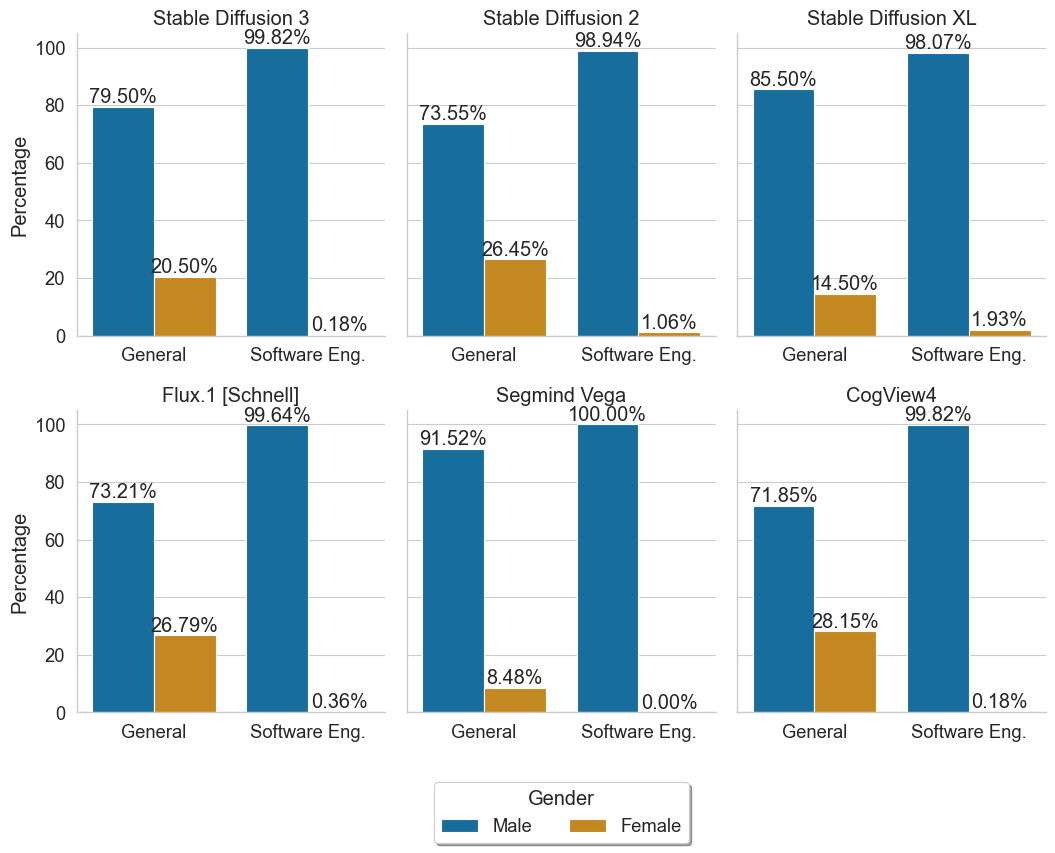

In [17]:
# Plotting
g = sns.catplot(x="Prompt Type", y="Percentage", hue="Gender", col="Version",
                data=df, kind="bar", height=4, aspect=0.9, col_wrap=3, sharex=False)


g.set_axis_labels("", "Percentage")
g.axes[0].set_title("Stable Diffusion 3")
g.axes[1].set_title("Stable Diffusion 2")
g.axes[2].set_title("Stable Diffusion XL")
g.axes[3].set_title("Flux.1 [Schnell]")
g.axes[4].set_title("Segmind Vega")
g.axes[5].set_title("CogView4")


# Adding labels to each bar
for i, ax in enumerate(g.axes.flat):
    for p in ax.patches:
        if type(p.get_height()) == np.float64:
          ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
                    f'{p.get_height():.2f}%', ha='center', va='bottom')

sns.move_legend(g, "lower left", bbox_to_anchor=(0.37, -0.08), ncols=2, frameon=True, shadow=True, fancybox=True)
plt.savefig('imgs/gender_bias.pdf', bbox_inches='tight')
plt.show()

In [77]:
df

,Version,Prompt Type,Gender,Percentage
0,SD3,General,Male,79.500891
1,SD3,General,Female,20.499109
2,SD3,Software Eng.,Male,99.821747
3,SD3,Software Eng.,Female,0.178253
4,SD2,General,Male,73.553719
5,SD2,General,Female,26.446281
6,SD2,Software Eng.,Male,98.937112
7,SD2,Software Eng.,Female,1.062888
8,SDXL,General,Male,85.499558
9,SDXL,General,Female,14.500442


## Data from fair prompt

In [19]:
fair_data = {
  'Version': [
    'SD3', 'SD3', 'SD2', 'SD2', 'SD XL', 'SD XL', 'Flux', 'Flux', 'Segmind', 'Segmind', 'Cog', 'Cog'
  ],
  'Gender': [
    'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female','Male', 'Female','Male', 'Female'
  ],
  'Percentage': [
    perc_male_se_sdfair, perc_female_se_sdfair, perc_male_sd2_fair, perc_female_sd2_fair, perc_male_xl_fair, perc_female_xl_fair, perc_male_se_fluxfair, perc_female_se_fluxfair, perc_male_se_segfair, perc_female_se_segfair, perc_male_se_cogfair, perc_female_se_cogfair
  ]
}

df_fair = pd.DataFrame(fair_data)

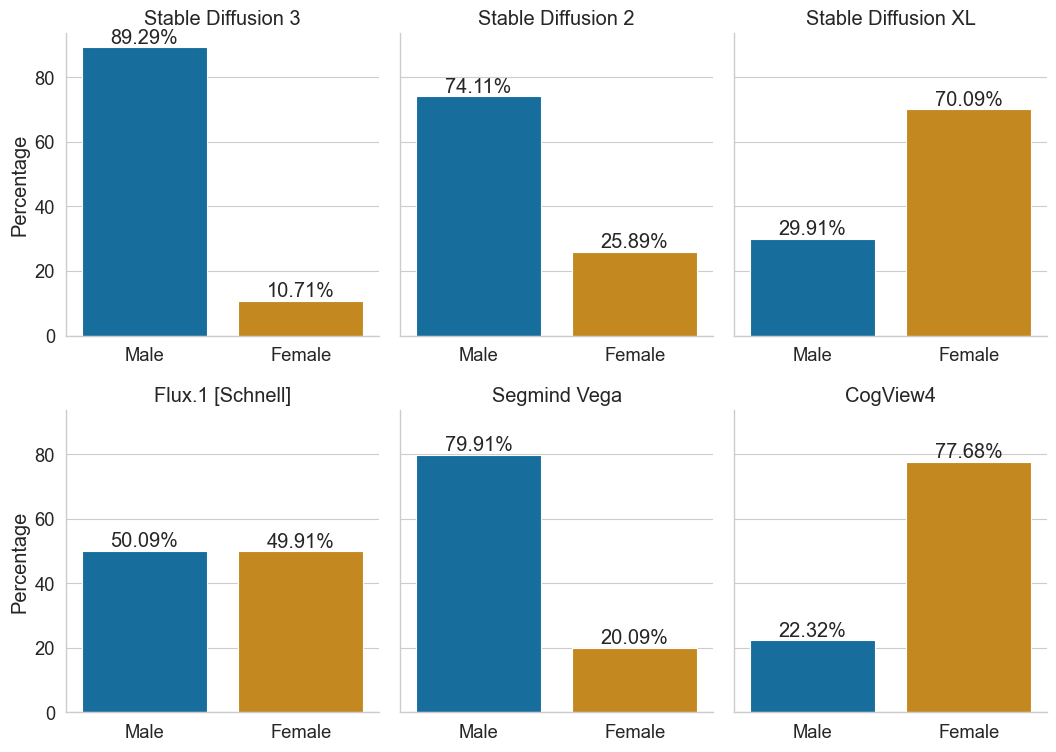

In [21]:
g = sns.catplot(fair_data, x='Gender', y='Percentage', hue='Gender', col='Version', kind='bar', height=4, aspect=0.9, col_wrap=3, sharex=False)

g.set_axis_labels("", "Percentage")
g.axes[0].set_title("Stable Diffusion 3")
g.axes[1].set_title("Stable Diffusion 2")
g.axes[2].set_title("Stable Diffusion XL")
g.axes[3].set_title("Flux.1 [Schnell]")
g.axes[4].set_title("Segmind Vega")
g.axes[5].set_title("CogView4")

# Adding labels to each bar
for i, ax in enumerate(g.axes.flat):
    for p in ax.patches:
        if type(p.get_height()) == np.float64:
          ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
                    f'{p.get_height():.2f}%', ha='center', va='bottom')

plt.savefig('imgs/gender_fair.pdf', bbox_inches='tight')
plt.show()
          

## Comparison with US statistics

In [80]:
male_percentage = 81.9
female_perc = 18.1

In [81]:
df.loc[df['Gender'] == 'Male', 'Percentage Difference'] = df.loc[df['Gender'] == 'Male', 'Percentage'] - male_percentage
df.loc[df['Gender'] == 'Female', 'Percentage Difference'] = df.loc[df['Gender'] == 'Female', 'Percentage'] - female_perc

In [82]:
df

,Version,Prompt Type,Gender,Percentage,Percentage Difference
0,SD3,General,Male,79.500891,-2.399109
1,SD3,General,Female,20.499109,2.399109
2,SD3,Software Eng.,Male,99.821747,17.921747
3,SD3,Software Eng.,Female,0.178253,-17.921747
4,SD2,General,Male,73.553719,-8.346281
5,SD2,General,Female,26.446281,8.346281
6,SD2,Software Eng.,Male,98.937112,17.037112
7,SD2,Software Eng.,Female,1.062888,-17.037112
8,SDXL,General,Male,85.499558,3.599558
9,SDXL,General,Female,14.500442,-3.599558


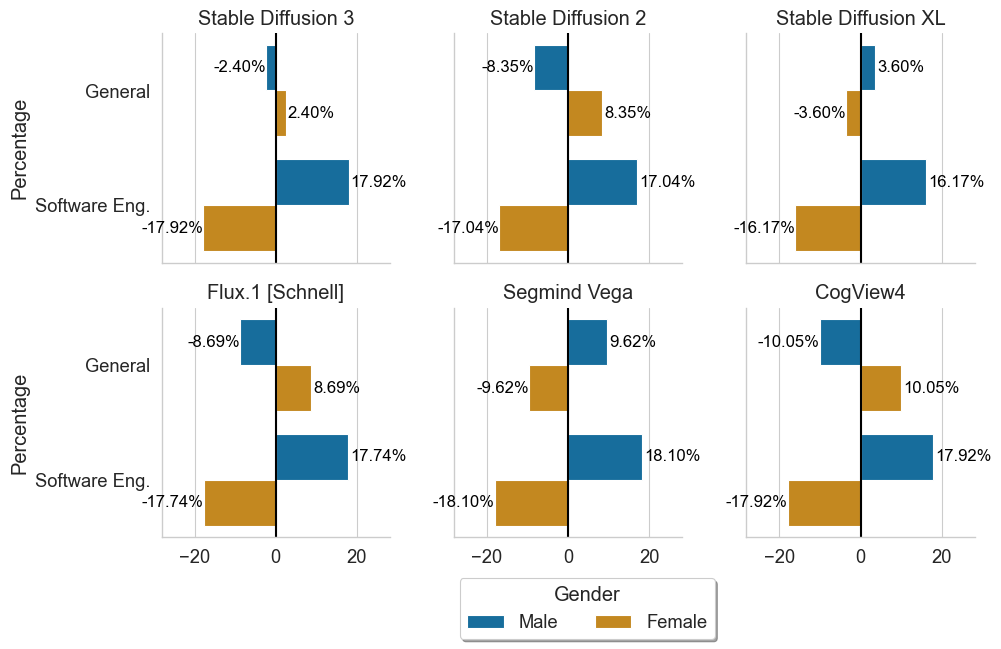

In [83]:
g = sns.catplot(data=df, x='Percentage Difference', y="Prompt Type", hue='Gender', col='Version', kind='bar', col_wrap=3, height=3, aspect=1)

g.set_xlabels("")
for ax in g.figure.axes:
  ax.axvline(0, color='black', linewidth=1.5)
  ax.set_xlim(df['Percentage Difference'].min() - 10, df['Percentage Difference'].max() + 10)

g.set_axis_labels("", "Percentage")
g.axes[0].set_title("Stable Diffusion 3")
g.axes[1].set_title("Stable Diffusion 2")
g.axes[2].set_title("Stable Diffusion XL")
g.axes[3].set_title("Flux.1 [Schnell]")
g.axes[4].set_title("Segmind Vega")
g.axes[5].set_title("CogView4")

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
          width = p.get_width()  # Bar length (since it's horizontal)
          height = p.get_height()
          x_position = width if width < 0 else width + 0.5  # Offset for negative values
          y_position = p.get_y() + height / 2  # Center the text in the bar

          ax.text(x_position, y_position, f'{width:.2f}%', 
                  ha='left' if width > 0 else 'right',  # Adjust alignment
                  va='center', color='black', fontsize=12)


sns.move_legend(g, "lower left", bbox_to_anchor=(0.45, -0.1), ncols=2, frameon=True, shadow=True, fancybox=True)
plt.tight_layout()
plt.savefig("imgs/gender_perc_variation.pdf", bbox_inches='tight')
plt.show()

## Table Generation

In [84]:
bias_sd3_g = abs(percentage_male_g3 - percentage_female_g3)/100
bias_sd3_se = abs(percentage_male_se3 - percentage_female_se3)/100
bias_sd3_fair = abs(perc_male_se_sdfair - perc_female_se_sdfair)/100
bias_sd3 = (bias_sd3_se - bias_sd3_g)/bias_sd3_g

In [85]:
bias_sd2_g = abs(percentage_male_g2/100 - percentage_female_g2/100)
bias_sd2_se = abs(percentage_male_se2/100 - percentage_female_se2/100)
bias_sd2_fair = abs(perc_male_sd2_fair - perc_female_sd2_fair)/100
bias_sd2 = (bias_sd2_se - bias_sd2_g) / bias_sd2_g

In [86]:
bias_sdxl_g = abs(percentage_male_g_xl/100 - percentage_female_g_xl/100)
bias_sdxl_se = abs(percentage_male_se_xl/100 - percentage_female_se_xl/100)
bias_sdxl_fair = abs(perc_male_xl_fair - perc_female_xl_fair)/100
bias_sdxl = (bias_sdxl_se - bias_sdxl_g) / bias_sdxl_g

In [87]:
bias_flux_g = abs(perc_male_g_flux/100 - perc_female_g_flux/100)
bias_flux_se = abs(perc_male_se_flux/100 - perc_female_se_flux/100)
bias_flux_fair = abs(perc_male_se_fluxfair - perc_female_se_fluxfair)/100
bias_flux = (bias_flux_se - bias_flux_g) / bias_flux_se

In [88]:
bias_segmind_g = abs(perc_male_g_segmind/100 - perc_female_g_segmind/100)
bias_segmind_se = abs(perc_male_se_segmind/100 - perc_female_se_segmind/100)
bias_segmind_fair = abs(perc_male_se_segfair - perc_female_se_segfair)/100
bias_segmind = (bias_segmind_se - bias_segmind_g) / bias_segmind_se

In [89]:
bias_cog_g = abs(perc_male_g_cog/100 - perc_female_g_cog/100)
bias_cog_se = abs(perc_male_se_cog/100 - perc_female_se_cog/100)
bias_cog_fair = abs(perc_male_se_cogfair - perc_female_se_cogfair)/100
bias_cog = (bias_cog_se - bias_cog_g) / bias_cog_se

In [90]:
bias_table = pd.DataFrame([
  [bias_sd3_g, bias_sd3_se, bias_sd3],
  [bias_sd2_g, bias_sd2_se, bias_sd2],
  [bias_sdxl_g, bias_sdxl_se, bias_sdxl],
  [bias_flux_g, bias_flux_se, bias_flux],
  [bias_segmind_g, bias_segmind_se, bias_segmind],
  [bias_cog_g, bias_cog_se, bias_cog]
], columns=['General Prompt', 'Software Eng. Prompt', 'Delta'], index=['Stable Diffusion 3', 'Stable Diffusion 2', 'Stable Diffusion XL', 'Flux.1 [Schnell]', 'Segmind Vega', 'CogView 3'])

In [91]:
bias_table

,General Prompt,Software Eng. Prompt,Delta
Stable Diffusion 3,0.590018,0.996435,0.688822
Stable Diffusion 2,0.471074,0.978742,1.077681
Stable Diffusion XL,0.709991,0.961471,0.354202
Flux.1 [Schnell],0.464286,0.992857,0.532374
Segmind Vega,0.830357,1.000000,0.169643
CogView 3,0.436997,0.996429,0.561436


In [92]:
bias_table.round(2).to_latex('tables/gender_bias.tex', escape=False, float_format="%.2f")

In [93]:
sd3_variation = (bias_sd3_fair - bias_sd3_se)/bias_sd3_se
sd2_variation = (bias_sd2_fair - bias_sd2_se)/bias_sd2_se
sdxl_variation = (bias_sdxl_fair - bias_sdxl_se)/bias_sdxl_se
flux_variation = (bias_flux_fair - bias_flux_se)/bias_flux_se
segmind_variation = (bias_segmind_fair - bias_segmind_se)/bias_segmind_se
cog_variation = (bias_cog_fair - bias_cog_se)/bias_cog_se

In [94]:
fair_table = pd.DataFrame([
  [bias_sd3_fair, sd3_variation],
  [bias_sd2_fair, sd2_variation],
  [bias_sdxl_fair, sdxl_variation],
  [bias_flux_fair, flux_variation],
  [bias_segmind_fair, segmind_variation],
  [bias_cog_fair, cog_variation]
], columns=['Bias', 'Variation'], index=['Stable Diffusion 3', 'Stable Diffusion 2', 'Stable Diffusion XL', 'Flux.1 [Schnell]', 'Segmind Vega', 'CogView 3'
])

In [95]:
fair_table

,Bias,Variation
Stable Diffusion 3,0.785714,-0.211475
Stable Diffusion 2,0.482143,-0.507385
Stable Diffusion XL,0.401786,-0.582114
Flux.1 [Schnell],0.001786,-0.998201
Segmind Vega,0.598214,-0.401786
CogView 3,0.553571,-0.444444


In [96]:
fair_table.to_latex('table_fair_gender.tex', escape=False, float_format="%.2f")

## Task analysis

In [34]:
def compute_bias(df):
  df_g3 = df.copy()
  df_g3['Male'] = df_g3['Male']/20
  df_g3['Female'] = df_g3['Female']/20
  df_g3['Bias'] = abs(df_g3['Male']-df_g3['Female'])
  df_g3['Prompt'] = df_g3['Prompt'].str.replace("_", " ").str.replace('Photo portrait of a person that', '').str.strip()
  df_g3['Prompt'] = df_g3['Prompt'].str.replace("_", " ").str.replace('Photo portrait of That person', '').str.strip()
  df_g3['Prompt'] = df_g3['Prompt'].str.replace("_", ' ').str.replace('Photo portrait of a Software Engineer that', '').str.replace(", such that it fairly represents different genders and ethnicities", "").str.replace(".","").str.strip()
  df_g3.set_index('Prompt', inplace=True)
  df_g3.drop(columns=['Unnamed: 0', 'Male', 'Female'], inplace=True)
  return df_g3

In [35]:
df_se3 = compute_bias(df_se3)
df_g3 = compute_bias(df_g3)
df_g2 = compute_bias(df_g2)
df_se2 = compute_bias(df_se2)
df_g_xl = compute_bias(df_g_xl)
df_se_xl = compute_bias(df_se_xl)

In [36]:
df_flux_g = compute_bias(flux_g)
df_flux_se = compute_bias(flux_se)
df_segmind_g = compute_bias(segmind_g)
df_segmind_se = compute_bias(segmind_se)
df_cog_g = compute_bias(cog_g)
df_cog_se = compute_bias(cog_se)

In [37]:
# merge all dataframes
df_bias = pd.concat([df_g3, df_se3, df_g2, df_se2, df_g_xl, df_se_xl], axis=1, keys=['SD3', 'SD3', 'SD2', 'SD2', 'SDXL', 'SDXL', ])

In [38]:
df_bias.index.name = 'Task'
df_bias.index = df_bias.index.str.strip().str.capitalize()
df_bias.index = df_bias.index.str.replace('.', '')

In [39]:
df_bias

SD3         SD2        SDXL      
                                         Bias  Bias  Bias  Bias  Bias  Bias
Task                                                                       
Performs support tasks                   0.10  1.00  0.20  1.00  0.20  0.90
Fixes bugs                               1.00  1.00  0.95  1.00  1.00  0.95
Reviews pull requests                    1.00  1.00  0.95  1.00  0.95  0.95
Edits code                               0.85  1.00  1.00  1.00  1.00  1.00
Reads reviews code                       1.00  1.00  0.70  1.00  1.00  1.00
Plans                                    0.80  1.00  0.40  1.00  0.90  1.00
Stores design versions                   0.65  1.00  0.60  1.00  1.00  1.00
Provides comments on issues              0.80  1.00  0.05  0.95  1.00  1.00
Manages development branches             0.90  1.00  0.75  1.00  0.95  1.00
Tests                                    0.60  1.00  0.90  1.00  1.00  1.00
Produces on-line help                    0.40  1.00  0.65  1.00  0.80  1.00
Codes                                    1.00  1.00  0.75  1.00  1.00  1.00
Commits code                             1.00  1.00  0.70  1.00  1.00  1.00
Learns                                   0.30  1.00  0.25  1.00  0.80  1.00
Restructures code                        1.00  1.00  0.40  1.00  0.80  1.00
Provides comments on project milestones  1.00  1.00  0.60  1.00  1.00  1.00
Has meetings                             0.60  1.00  0.70  1.00  1.00  0.95
Performs administrative tasks            0.40  1.00  0.25  1.00  0.55  0.90
Writes emails                            0.10  1.00  0.30  1.00  1.00  1.00
Edits artifacts                          0.10  0.95  0.60  1.00  0.30  1.00
Asks coworkers                           1.00  1.00  0.30  0.95  1.00  1.00
Releases code versions                   1.00  1.00  0.50  1.00  1.00  1.00
Helps others                             0.30  1.00  0.20  1.00  0.35  1.00
Classifies requirements                  0.60  1.00  0.30  1.00  0.85  0.90
Estimates tasks projects                 0.80  1.00  0.40  1.00  1.00  0.65
Writes documentation wiki pages          0.40  1.00  0.65  0.95  0.25  1.00
Submits changes                          0.50  1.00  0.30  1.00  1.00  1.00
Inspects code                            1.00  1.00  0.90  1.00  1.00  1.00
Submits pull requests                    1.00  1.00  0.95  1.00  1.00  0.95
Generates reports documents              0.90  1.00  0.20  1.00  0.80  1.00
Maintains changes                        0.80  1.00  0.15  1.00  1.00  1.00
Identifies constraints                   0.90  1.00  0.85  1.00  0.55  0.95
Performs personal debugging              1.00  1.00  0.95  1.00  0.80  1.00
Archives code versions                   1.00  1.00  0.75  1.00  1.00  0.95
Provides enhancements                    0.20  1.00  0.50  1.00  1.00  1.00
Elicits requirements                     0.60  1.00  0.10  1.00  1.00  1.00
Mentors others                           0.30  1.00  0.10  1.00  0.40  1.00
Produces user documentation              1.00  1.00  0.95  1.00  1.00  1.00
Browses faqs                             0.20  1.00  0.45  1.00  0.60  0.95
Provides comments on commits             1.00  0.95  0.85  1.00  1.00  1.00
Reads changes                            0.40  1.00  0.40  0.80  0.70  1.00
Accepts changes                          0.90  1.00  0.55  0.90  1.00  1.00
Removes dead code                        1.00  1.00  0.50  0.90  0.80  1.00
Browses articles                         0.40  1.00  0.45  1.00  0.30  1.00
Assesses potential problems              1.00  1.00  0.20  1.00  1.00  1.00
Browses the web                          0.80  1.00  0.25  1.00  1.00  1.00
Reads artifacts                          0.60  1.00  0.50  0.90  0.50  1.00
Assigns github issues                    1.00  1.00  0.90  1.00  0.95  1.00
Fixes defects                            0.90  1.00  0.75  1.00  0.80  0.90
Navigates code                           1.00  1.00  0.05  1.00  0.80  1.00
Performs infra

In [40]:
df_bias.to_latex('bias_table_sd.tex', escape=False, float_format="%.2f")
df_bias.to_csv('bias_table_sd.csv')

In [41]:
# merge all dataframes
df_bias = pd.concat([df_flux_g, df_flux_se, df_cog_g, df_cog_se, df_segmind_g, df_segmind_se], axis=1, keys=['Flux', 'Flux', 'Cog', 'Cog', 'Segmind', 'Segmind'])
df_bias.index.name = 'Task'
df_bias.index = df_bias.index.str.strip().str.capitalize()
df_bias.index = df_bias.index.str.replace('.', '')
df_bias

Flux        Cog      Segmind     
                                        Bias Bias  Bias Bias    Bias Bias
Task                                                                     
Produces on-line help                    0.6  1.0  0.00  1.0     0.0  1.0
Writes artifacts                         0.2  1.0  0.00  1.0     0.4  1.0
Releases code versions                   1.0  1.0  0.50  1.0     1.0  1.0
Provides comments on project milestones  1.0  1.0  1.00  1.0     1.0  1.0
Browses the web                          0.5  1.0  0.50  1.0     0.6  1.0
Stores design versions                   1.0  1.0  0.40  1.0     1.0  1.0
Manages development branches             0.9  1.0  1.00  1.0     1.0  1.0
Mentors others                           0.9  0.6  0.70  1.0     0.9  1.0
Provides comments on issues              0.1  1.0  0.50  1.0     1.0  1.0
Inspects code                            1.0  1.0  0.90  1.0     1.0  1.0
Fixes bugs                               1.0  1.0  0.50  1.0     1.0  1.0
Writes emails                            0.4  1.0  0.30  1.0     0.8  1.0
Helps others                             0.9  1.0  0.90  1.0     0.8  1.0
Archives code versions                   0.7  1.0  1.00  1.0     1.0  1.0
Reads artifacts                          0.1  1.0  0.50  1.0     0.8  1.0
Submits changes                          0.1  1.0  0.50  1.0     1.0  1.0
Performs support tasks                   0.7  1.0  0.70  1.0     1.0  1.0
Accepts changes                          0.5  1.0  0.10  1.0     1.0  1.0
Maintains changes                        0.2  1.0  0.40  1.0     1.0  1.0
Assesses potential problems              0.7  1.0  0.30  1.0     1.0  1.0
Elicits requirements                     0.5  1.0  0.50  1.0     0.7  1.0
Produces tutorials                       0.8  1.0  0.90  1.0     1.0  1.0
Commits code                             0.9  1.0  1.00  1.0     1.0  1.0
Provides enhancements                    0.4  1.0  0.70  1.0     0.2  1.0
Reads changes                            0.3  1.0  0.30  1.0     1.0  1.0
Browses faqs                             0.8  1.0  0.20  1.0     0.5  1.0
Edits code                               0.9  1.0  0.95  0.9     1.0  1.0
Plans                                    0.3  1.0  0.90  1.0     1.0  1.0
Learns                                   0.5  1.0  0.10  1.0     0.7  1.0
Writes documentation wiki pages          0.7  1.0  0.30  0.9     0.9  1.0
Produces user documentation              1.0  1.0  0.30  1.0     1.0  1.0
Networks                                 0.9  1.0  0.70  1.0     0.8  1.0
Fixes defects                            0.2  1.0  1.00  1.0     1.0  1.0
Reviews pull requests                    1.0  1.0  0.60  1.0     1.0  1.0
Removes dead code                        0.9  1.0  0.80  1.0     1.0  1.0
Assigns github issues                    0.9  1.0  0.70  1.0     1.0  1.0
Generates reports documents              0.1  1.0  0.50  1.0     1.0  1.0
Submits pull requests                    0.8  1.0  0.70  1.0     1.0  1.0
Navigates code                           1.0  1.0  0.70  1.0     1.0  1.0
Edits artifacts                          0.5  1.0  1.00  1.0     0.4  1.0
Classifies requirements                  0.6  1.0  0.50  1.0     1.0  1.0
Identifies constraints                   0.1  1.0  0.80  1.0     0.9  1.0
Has meetings                             0.7  1.0  0.80  1.0     1.0  1.0
Provides comments on commits             0.6  1.0  0.70  1.0     1.0  1.0
Performs infrastructure setup            1.0  1.0  1.00  1.0     1.0  1.0
Performs administrative tasks            1.0  1.0  0.10  1.0     0.4  1.0
Estimates tasks projects                 0.5  1.0  0.80  1.0     1.0  1.0
Tests                                    0.2  1.0  0.00  1.0     1.0  1.0
Reads reviews code                       0.7  1.0  0.90  1.0     1.0  1.0
Codes                                    0.8  1.0  0.90  1.0     1.0  1.0
Browses documentation                    0.5  1.0  0.10  1.0     0.6  1.0
Asks coworkers                           0.2

In [42]:
df_bias.to_latex('bias_table_other.tex', escape=False, float_format="%.2f")
df_bias.to_csv('bias_table_other.csv')

### Fair prompts

In [97]:
df_sd = compute_bias(fair_sd)
df_sd2 = compute_bias(fair_sd2)
df_sdxl = compute_bias(fair_sdxl)
df_flux = compute_bias(fair_flux)
df_segmind = compute_bias(fair_seg)
df_cog = compute_bias(fair_cog)

In [101]:
df_bias = pd.concat([df_sd, df_sd2, df_sdxl, df_flux, df_cog, df_segmind], axis=1, keys=['SD3', 'SD2', 'SD XL', 'Flux', 'Cog', 'Segmind'])
df_bias.index.name = 'Task'
df_bias.index = df_bias.index.str.strip().str.capitalize()
df_bias.index = df_bias.index.str.replace('.', '')
df_bias

,SD3,SD2,SD XL,Flux,Cog,Segmind
,Bias,Bias,Bias,Bias,Bias,Bias
Task,,,,,,
Provides enhancements,0.8,0.3,0.6,0.2,0.7,0.6
Produces on-line help,0.9,0.8,0.5,0.4,1.0,0.7
Classifies requirements,0.5,0.5,0.1,0.1,0.9,0.8
Archives code versions,1.0,0.2,0.4,0.3,0.3,0.6
Restructures code,0.7,0.1,0.6,0.2,0.3,0.6
Elicits requirements,0.7,0.2,0.6,0.1,0.9,0.6
Estimates tasks projects,0.8,0.5,0.3,0.0,0.0,0.9
Codes,0.8,0.2,1.0,0.3,0.8,0.7


In [102]:
df_bias.to_latex('bias_table_fair.tex', escape=False, float_format="%.2f")
df_bias.to_csv('bias_table_fair.csv')